In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration

from keras.models import Model
from keras.layers import GlobalAveragePooling2D

In [ ]:
# Resnet with pretrained imagenet
# Load the ResNet50 model without the top dense layer
model = ResNet50(include_top=False, weights='imagenet', pooling='max')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [ ]:


# Set the path to the directory containing the 660 training images
#for not used
not_used_train_dir = "/content/drive/Shareddrives/GAN_CLEF_2023/GAN_CLEF_dataset/img_real/not_used"
used_train_dir = "/content/drive/Shareddrives/GAN_CLEF_2023/GAN_CLEF_dataset/img_real/used"
artificial_train_dir = "/content/drive/Shareddrives/GAN_CLEF_2023/GAN_CLEF_dataset/img_gen/generated"
# Create an empty array to hold the feature vectors for each image
feature_vectors = np.empty((660, 2048))
feature_vectors_real = np.empty((160, 2048))


In [ ]:

# Loop over the images in the training directory, preprocess them, and extract their feature vectors
i = 0
for subdir, dirs, files in os.walk(not_used_train_dir):
    for file in files:
        filepath = subdir + os.sep + file
        img = load_img(filepath, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x/255.0
        features = model.predict(x)
        feature_vectors[i,:] = features
        feature_vectors_real[i:] = features
        i += 1

1/1 [==============================] - 0s 218ms/step


In [ ]:
for subdir, dirs, files in os.walk(used_train_dir):
    for file in files:
        filepath = subdir + os.sep + file
        img = load_img(filepath, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x/255.0
        features = model.predict(x)
        feature_vectors[i,:] = features
        feature_vectors_real[i:] = features
        i += 1

1/1 [==============================] - 0s 196ms/step


In [ ]:
for subdir, dirs, files in os.walk(artificial_train_dir):
    for file in files:
        filepath = subdir + os.sep + file
        img = load_img(filepath, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x/255.0
        features = model.predict(x)
        feature_vectors[i,:] = features
        i += 1

1/1 [==============================] - 0s 207ms/step


In [ ]:
y_label = np.zeros(80)
temp = np.ones(80)
y_label = np.append(y_label,temp)
temp = np.ones(500)
for z in range(500):
  temp[z]=2
y_label = np.append(y_label,temp)
print(y_label)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.

In [ ]:
print(feature_vectors.shape)

(660, 2048)


In [ ]:
# Perform feature agglomeration to reduce the dimensionality of the feature vectors
#agglo = FeatureAgglomeration(n_clusters=32)
#agglo.fit(feature_vectors)
#feature_vectors_reduced = agglo.transform(feature_vectors)

# Perform hierarchical clustering on the reduced feature vectors
clustering = AgglomerativeClustering(linkage = "ward", distance_threshold=0,n_clusters=None)
model2 = clustering.fit_predict(feature_vectors)


In [ ]:
clustering = AgglomerativeClustering(linkage = "ward",n_clusters=2)
model1 = clustering.fit_predict(feature_vectors_real)

In [ ]:
test_dir = "/content/drive/Shareddrives/GAN_CLEF_2023/GAN_CLEF_dataset/img_test/real_unknown_1"

test_dir_2 = "/content/drive/Shareddrives/GAN_CLEF_2023/GAN_CLEF_dataset/test/test_1/generated_1"
j=0
feature_vectors_test = np.empty((200, 2048))
ids = []
results = []
for subdir, dirs, files in os.walk(test_dir):
    for file in files:
        filepath = subdir + os.sep + file
        img = load_img(filepath, target_size=(224, 224))
        ids.append(filepath)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x/255.0
        features = model.predict(x)

        #features_reduced = agglo.transform(features)
        feature_vectors_test[j,:] = features
        j+=1

label = clustering.fit_predict(feature_vectors_test)
results.append(label)

1/1 [==============================] - 0s 194ms/step


In [ ]:
print(results)

[array([184, 187, 148, 163, 123, 121, 144, 116, 199, 162, 112, 159, 118,
       160, 177, 133, 174, 167, 110, 149, 100, 183, 197, 189, 152, 108,
       169, 115, 140, 142, 179, 143, 102, 157,  71, 155, 173, 101, 170,
        84, 136, 180, 147, 151, 131, 195, 107, 190, 182, 166, 106, 191,
       193,  91, 192, 146, 181,  99, 104, 158, 178, 150, 129,  78, 185,
       117, 172, 164, 128, 171, 153, 103,  79, 196, 194, 105, 119, 139,
        74, 132,  52,  95, 120, 168, 186, 130, 165,  86, 113,  73,  96,
       126, 124, 122, 141, 175, 125,  85,  83, 109,  97,  49,  64, 134,
        82, 156,  36, 188,  50, 127,  63,  89,  53,  65,  41,  93,  75,
        59, 111,  94,  57, 145, 137,  92, 198,  60,  62,  58,  72, 176,
       154, 114,  87,  77,  66,  29,  98,  32,  88, 138,  35,  38,  61,
        56,  45,  43,  47,  55,  81, 161,  51,  54,  80,  39,  42,  27,
        69,  76,  28,  40,  19,  90,  20,  37,  68,  24,  48,  31,  70,
        25,  26,  18,  12,  23,  17,  13,  11,  46,  30,  14,  

Cophenetic correlation coefficient: 0.5679261106594059


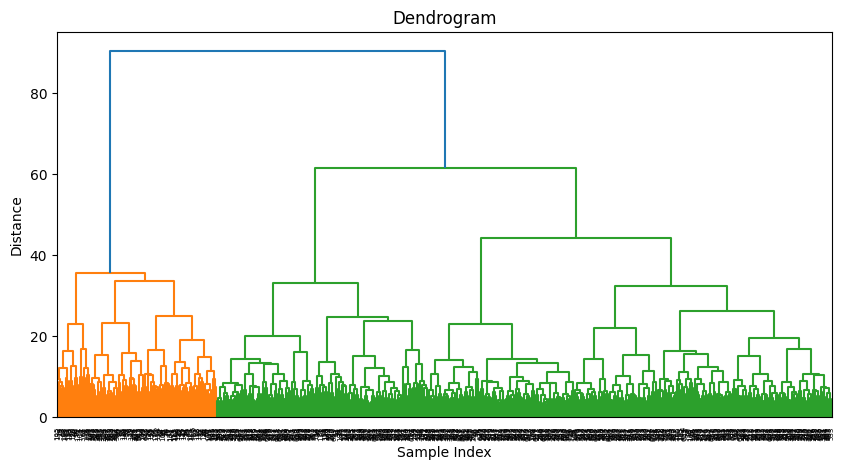

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist

# Generate some random data
X, y = make_blobs(n_samples=50, centers=3, random_state=42)

# Fit the agglomerative clustering model
# Compute the linkage matrix
Z = linkage(feature_vectors, method='ward')
c, coph_dists = cophenet(Z, pdist(feature_vectors))
print(f"Cophenetic correlation coefficient: {c}")
# Generate the dendrogram
plt.figure(figsize=(10, 5))
plt.title("Dendrogram")
dendrogram(Z, labels=np.arange(feature_vectors.shape[0]))
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [ ]:
threshold = 40
subsets = fcluster(Z, threshold, criterion='distance').astype(np.int64)

# Check distribution of samples in each subset
for subset in np.unique(subsets):
    subset_indices = np.where(subsets == subset)[0]
    subset_labels = y_label[subset_indices]
    class_counts = np.bincount(subset_labels.astype(np.int64)).astype(np.int64)
    subset_distance = Z[subset_indices[0], 2]
    print(f"Subset {subset}: Class counts - {class_counts}, Distance - {subset_distance}")

Subset 1: Class counts - [12 16], Distance - 2.884633954927396
Subset 2: Class counts - [10  7 29], Distance - 2.864799912433949
Subset 3: Class counts - [31 27  4], Distance - 2.9276799445100465
Subset 4: Class counts - [ 1  1 82], Distance - 3.546091067908068
Subset 5: Class counts - [11 15 70], Distance - 3.248850484895076
Subset 6: Class counts - [  7   3 115], Distance - 3.3544518110564527
Subset 7: Class counts - [ 1  0 69], Distance - 3.444348715273145
Subset 8: Class counts - [  7  11 131], Distance - 3.1005474813530696


##Creating the prediction files


In [ ]:
# Set the path to the directory containing the 200 test images
test_dir = "/content/drive/Shareddrives/GAN_CLEF_2023/GAN_CLEF_dataset/img_test/real_unknown_1"

test_dir_2 = "/content/drive/Shareddrives/GAN_CLEF_2023/GAN_CLEF_dataset/test/test_1/generated_1"
j=0
feature_vectors_test = np.empty((10200, 32))
ids = []
# Loop over the images in the test directory, preprocess them, extract their feature vectors,
# reduce the dimensionality of the feature vectors, and predict their cluster labels
results = []
for subdir, dirs, files in os.walk(test_dir):
    for file in files:
        filepath = subdir + os.sep + file
        img = load_img(filepath, target_size=(224, 224))
        ids.append(filepath)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x/255.0
        features = model.predict(x)
        features_reduced = agglo.transform(features)
        feature_vectors_test[j,:] = features_reduced
        j+=1

for subdir, dirs, files in os.walk(test_dir_2):
    for file in files:
        filepath = subdir + os.sep + file
        img = load_img(filepath, target_size=(224, 224))
        ids.append(filepath)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x/255.0
        features = model.predict(x)
        features_reduced = agglo.transform(features)
        feature_vectors_test[j,:] = features_reduced
        j+=1

label = clustering.fit_predict(feature_vectors_test)
results.append(label)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 194ms/step


In [ ]:
# Print the predicted labels for the test images
print(results)

[array([2, 0, 0, ..., 0, 2, 0])]


In [ ]:
ct=0
for i in results[0]:
  if i==0:
    ct+=1

print(ct)

89


In [ ]:
for id in ids:
  print(id[83:-4])

real_unknown_0001
real_unknown_0002
real_unknown_0003
real_unknown_0004
real_unknown_0005
real_unknown_0006
real_unknown_0007
real_unknown_0008
real_unknown_0009
real_unknown_0010
real_unknown_0011
real_unknown_0012
real_unknown_0013
real_unknown_0014
real_unknown_0015
real_unknown_0016
real_unknown_0017
real_unknown_0018
real_unknown_0019
real_unknown_0020
real_unknown_0021
real_unknown_0022
real_unknown_0023
real_unknown_0024
real_unknown_0025
real_unknown_0026
real_unknown_0027
real_unknown_0028
real_unknown_0029
real_unknown_0030
real_unknown_0031
real_unknown_0032
real_unknown_0033
real_unknown_0034
real_unknown_0035
real_unknown_0036
real_unknown_0037
real_unknown_0038
real_unknown_0039
real_unknown_0040
real_unknown_0041
real_unknown_0042
real_unknown_0043
real_unknown_0044
real_unknown_0045
real_unknown_0046
real_unknown_0047
real_unknown_0048
real_unknown_0049
real_unknown_0050
real_unknown_0051
real_unknown_0052
real_unknown_0053
real_unknown_0054
real_unknown_0055
real_unkno

In [ ]:
import csv
op_file = open('/content/drive/Shareddrives/GAN_CLEF_2023/Predictions/prediction_heirarchical_run4.csv', mode='w')
op_writer = csv.writer(op_file, delimiter=',')


for i in range(200):
  id = ids[i][83:-4]
  pred = results[0][i]
  print([id,pred])
  op_writer.writerow([id,pred])

['real_unknown_0001', 1]
['real_unknown_0002', 0]
['real_unknown_0003', 0]
['real_unknown_0004', 1]
['real_unknown_0005', 1]
['real_unknown_0006', 0]
['real_unknown_0007', 1]
['real_unknown_0008', 1]
['real_unknown_0009', 0]
['real_unknown_0010', 1]
['real_unknown_0011', 1]
['real_unknown_0012', 1]
['real_unknown_0013', 0]
['real_unknown_0014', 1]
['real_unknown_0015', 0]
['real_unknown_0016', 1]
['real_unknown_0017', 0]
['real_unknown_0018', 0]
['real_unknown_0019', 0]
['real_unknown_0020', 0]
['real_unknown_0021', 1]
['real_unknown_0022', 0]
['real_unknown_0023', 1]
['real_unknown_0024', 1]
['real_unknown_0025', 0]
['real_unknown_0026', 1]
['real_unknown_0027', 0]
['real_unknown_0028', 1]
['real_unknown_0029', 0]
['real_unknown_0030', 0]
['real_unknown_0031', 1]
['real_unknown_0032', 1]
['real_unknown_0033', 1]
['real_unknown_0034', 1]
['real_unknown_0035', 0]
['real_unknown_0036', 1]
['real_unknown_0037', 0]
['real_unknown_0038', 1]
['real_unknown_0039', 0]
['real_unknown_0040', 1]
